## Predicting heart disease using machine learning

This notebook looks into various python based machine learning and data science libraries in attempt to build machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Definition

Given clinical parameter about a patient, can we predict whether or not they have heart disease?

### 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version availabel at Kaggle

### 3. Evaluation

(what define success?)

If we can reach 95% accuracy at predicting whether or not a patient has a heart disease during the proof of concept, we'll persue the project

### 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).



### 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create Data Dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
- Typical angina: chest pain related decrease blood supply to the heart
- Atypical angina: chest pain not related to heart
- Non-anginal pain: typically esophageal spasms (non heart related)
- Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
- above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
-  Nothing to note
-  ST-T Wave abnormality
- 2: Possible or definite left ventricular hypertrophy
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
- Upsloping: better heart rate with excercise (uncommon)
- Flatsloping: minimal change (typical healthy heart)
- Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
- colored vessel means the doctor can see the blood passing through
- the more blood movement the better (no clots)
13. thal - thalium stress result
- 1,3: normal
- 6: fixed defect: used to be defect but ok now
- 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
# Import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,accuracy_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
heart_disease=pd.read_csv('dataset/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



### Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset your working with

1. What question(s) are you trying to solve
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# 1 heart disease
# 0 No heart disease
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

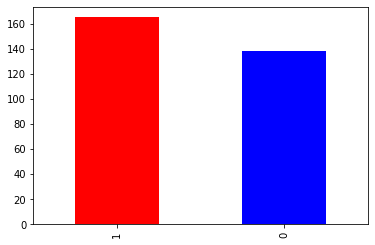

In [4]:
heart_disease['target'].value_counts().plot(kind='bar',color=['red','blue'])

In [5]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [7]:
# 1 - Male
# 0 - Female
heart_disease['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(heart_disease['target'],heart_disease['sex'])

sex,0,1
target,,
0,24,114
1,72,93


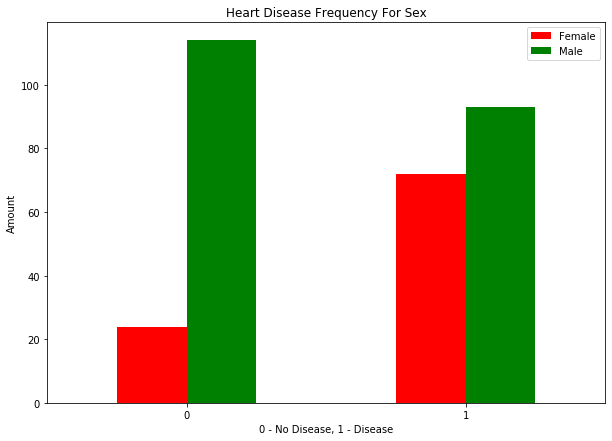

In [9]:
# Create a plot of cross tab
pd.crosstab(heart_disease['target'],heart_disease['sex']).plot(kind='bar',
                                                              color=['red','green'],
                                                                    figsize=(10,7))
plt.title('Heart Disease Frequency For Sex')
plt.xlabel('0 - No Disease, 1 - Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

In [10]:

# thalach - max heart rate
heart_disease['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

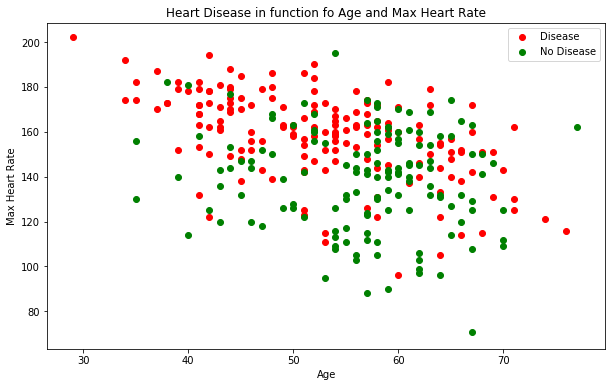

In [11]:
# Create another figure
plt.figure(figsize=(10,6))

plt.scatter(heart_disease.age[heart_disease['target']==1],
           heart_disease.thalach[heart_disease['target']==1],
           c='red')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

plt.scatter(heart_disease.age[heart_disease['target']==0],
           heart_disease.thalach[heart_disease['target']==0],
           c='green')

# Add some helpful info
plt.title('Heart Disease in function fo Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

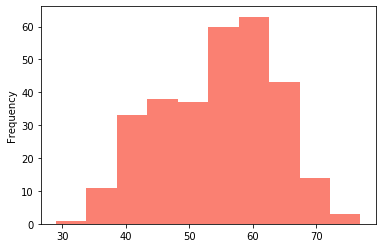

In [12]:
# Check the distribution of the age column with a histogram
heart_disease['age'].plot.hist(color='salmon');

### Heart Disease Frequency per chest pain type

1. cp - chest pain type
- Typical angina: chest pain related decrease blood supply to the heart
- Atypical angina: chest pain not related to heart
- Non-anginal pain: typically esophageal spasms (non heart related)
- Asymptomatic: chest pain not showing signs of disease

In [13]:

pd.crosstab(heart_disease['cp'],heart_disease['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


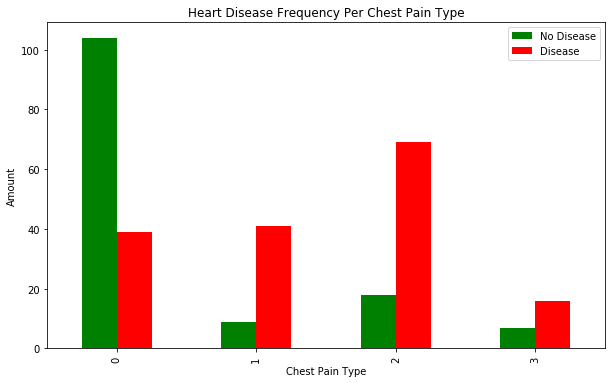

In [14]:
# Make the crosstab more visual
pd.crosstab(heart_disease['cp'],heart_disease['target']).plot(kind='bar',
                                                             figsize=(10,6),
                                                             color=['green','red'])

# Add some helful info
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease']);

In [15]:
# Make a correlation matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


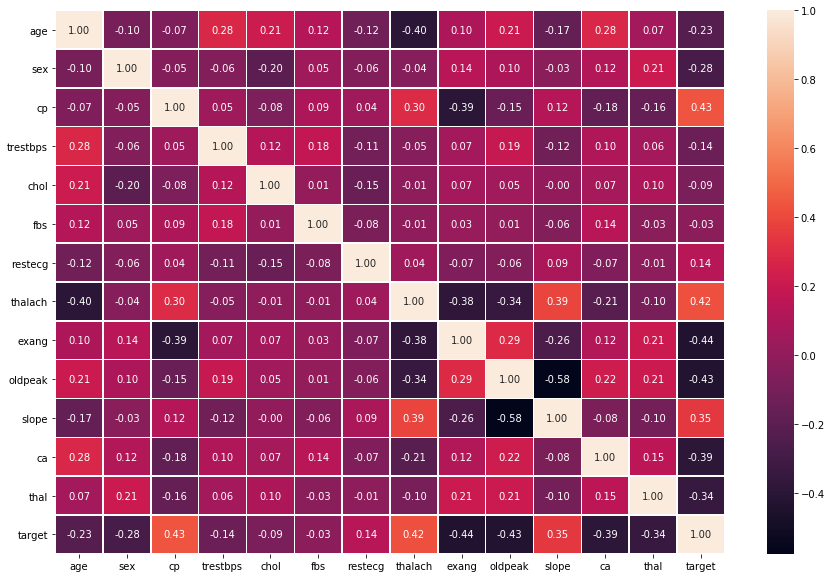

In [32]:
corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.4,
              fmt='0.2f',)

### 5. Modelling

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Split the data into x and y
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### We are going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest

In [21]:
# Put the models in a dictionary
models={
    'Logistic Regression':LogisticRegression(),
    'K-Neighbours':KNeighborsClassifier(),
    'Random Forest':RandomForestClassifier()
}

def fit(models,x_train,y_train,x_test,y_test):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score
result=fit(models,x_train,y_train,x_test,y_test)
result

C:\Users\Baraka\Desktop\sample_project_1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7868852459016393,
 'K-Neighbours': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

In [22]:
model_compare=pd.DataFrame(result,index=['accuracy'])
model_compare

,Logistic Regression,K-Neighbours,Random Forest
accuracy,0.786885,0.57377,0.803279


In [23]:
model_compare.T

,accuracy
Logistic Regression,0.786885
K-Neighbours,0.573770
Random Forest,0.803279


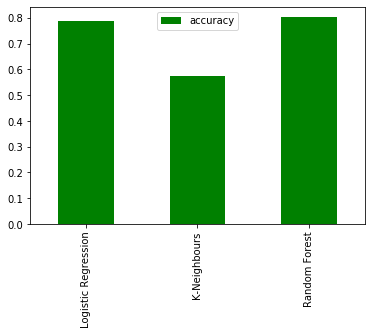

In [24]:
model_compare.T.plot.bar(color='green')

Let's look at following

- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 Score
- Classification Report
- ROC curve
- Area under the curve (AUC)

### Hyperparameter Tuning

In [25]:
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [36]:
train_scores

[1.0,
 0.7933884297520661,
 0.78099173553719,
 0.8016528925619835,
 0.7644628099173554,
 0.7727272727272727,
 0.768595041322314,
 0.7396694214876033,
 0.731404958677686,
 0.7396694214876033,
 0.7396694214876033,
 0.7355371900826446,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.71900826446281,
 0.71900826446281,
 0.7066115702479339,
 0.71900826446281,
 0.7024793388429752]

In [27]:
test_scores

[0.6065573770491803,
 0.5409836065573771,
 0.6065573770491803,
 0.5245901639344263,
 0.5737704918032787,
 0.5409836065573771,
 0.5245901639344263,
 0.5245901639344263,
 0.5409836065573771,
 0.5081967213114754,
 0.5245901639344263,
 0.5081967213114754,
 0.5409836065573771,
 0.5245901639344263,
 0.4918032786885246,
 0.5409836065573771,
 0.5573770491803278,
 0.6065573770491803,
 0.5573770491803278,
 0.5573770491803278]

Maximum KNN score on the test data: 60.66%


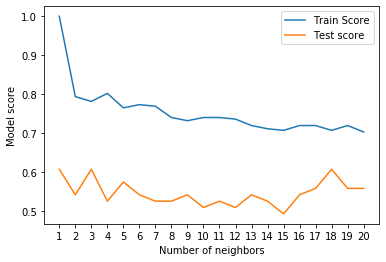

In [28]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test score');
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparametr tuning with RandomizedSearchCV

We're going to tune:

- LogisticRegression()
- RandomForestClassifier()

using RandomizedSearchCV

`RandomizedSearchCV` - Randomized Search Cross Validation. what it does is instead of doing a normal training test split like we've done before by creating one training split and a test split, it create five different versions of training data and five different versions of the test data and then evaluate different parameters all of these different sets of all of the versions of the training and test data and work out which set of parameters or hyper parameters is best across these five different splits rather than just being one single split.

In [37]:
log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

rfc_grid={'n_estimators':np.arange(10,1000,50),
            'max_depth': [None,3,5,10],
            'min_samples_split': np.arange(2,20,2),
            'min_samples_leaf': np.arange(1,20,2)}

In [38]:
# Tune LogisticRegression

# Set up a random seed
np.random.seed(42)

# Set random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [39]:

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [40]:
rs_log_reg.score(x_test,y_test)

0.7540983606557377